In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [8]:
datak =  pd.read_excel("/Users/tejalambilwade/Downloads/KickstarterData_Facts-1 (1).xlsx")

In [ ]:
# understanding the data 

In [10]:
data.head()

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
0,1,2019-07-01,female,100,white,4,vanilla,yes,<50K,yes,7,0
1,2,2019-07-01,female,100,blue,5,vanilla,yes,<50K,yes,5,1
2,3,2019-07-01,female,100,silver,6,vanilla,yes,<50K,yes,6,1
3,4,2019-07-01,female,100,silver,5,vanilla,yes,<50K,yes,5,1
4,5,2019-07-01,male,100,white,1,vanilla,yes,<50K,yes,7,0


In [11]:
data.tail()

,Donate ID,Donate Date,Gender,Deposit Amount,Preferred Color of Device,Ice Cream Products Consumed Per Week,Favorite Flavor Of Ice Cream,Donated To Kick Starter Before,Household Income,Do you own a Keurig,How many desserts do you eat a week,Purchased
9995,9996,2019-07-09,male,100,black,4,chocolate,no,Not Reported,no,5,1
9996,9997,2019-07-09,male,100,silver,6,no preference,yes,Not Reported,yes,6,0
9997,9998,2019-07-09,male,0,blue,3,chocolate,yes,Not Reported,yes,5,0
9998,9999,2019-07-09,male,0,blue,6,vanilla,no,Not Reported,no,6,0
9999,10000,2019-07-09,male,1,black,7,chocolate,yes,Not Reported,yes,7,0


In [21]:
data.dtypes

Donate ID                                        int64
Donate Date                             datetime64[ns]
Gender                                          object
Deposit Amount                                   int64
Preferred Color of Device                       object
Ice Cream Products Consumed Per Week             int64
Favorite Flavor Of Ice Cream                    object
Donated To Kick Starter Before                  object
Household Income                                object
Do you own a Keurig                             object
How many desserts do you eat a week              int64
Purchased                                        int64
dtype: object

In [22]:
data.isnull().sum()

Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64

In [30]:
a= []
for i in data.columns:
    if type(data[i].dtypes) == 'int64':
        a.append(i)
print(a)        

[]


In [31]:
data.select_dtypes(include=['int'])

,Donate ID,Deposit Amount,Ice Cream Products Consumed Per Week,How many desserts do you eat a week,Purchased
0,1,100,4,7,0
1,2,100,5,5,1
2,3,100,6,6,1
3,4,100,5,5,1
4,5,100,1,7,0
...,...,...,...,...,...
9995,9996,100,4,5,1
9996,9997,100,6,6,0
9997,9998,0,3,5,0
9998,9999,0,6,6,0


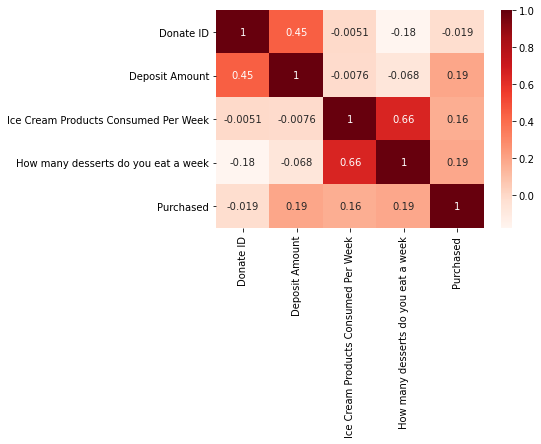

Donate ID                               0.018803
Deposit Amount                          0.194643
Ice Cream Products Consumed Per Week    0.164915
How many desserts do you eat a week     0.189489
Purchased                               1.000000
Name: Purchased, dtype: float64


In [36]:
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor_target=abs(cor["Purchased"])
relevent_features = cor_target[cor_target>0]
print(relevent_features)

In [14]:
data.describe()

,Donate ID,Deposit Amount,Ice Cream Products Consumed Per Week,How many desserts do you eat a week,Purchased
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,139.515800,4.962300,6.686800,0.651300
std,2886.89568,80.483091,3.165293,2.460592,0.476583
min,1.00000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,100.000000,2.000000,5.000000,0.000000
50%,5000.50000,100.000000,5.000000,7.000000,1.000000
75%,7500.25000,119.000000,8.000000,9.000000,1.000000
max,10000.00000,400.000000,10.000000,10.000000,1.000000


In [16]:
data.columns

Index(['Donate ID', 'Donate Date', 'Gender', 'Deposit Amount',
       'Preferred Color of Device', 'Ice Cream Products Consumed Per Week',
       'Favorite Flavor Of Ice Cream', 'Donated To Kick Starter Before',
       'Household Income', 'Do you own a Keurig',
       'How many desserts do you eat a week', 'Purchased'],
      dtype='object')

In [18]:
data.nunique()

Donate ID                               10000
Donate Date                                 7
Gender                                      2
Deposit Amount                            302
Preferred Color of Device                   6
Ice Cream Products Consumed Per Week       11
Favorite Flavor Of Ice Cream                5
Donated To Kick Starter Before              2
Household Income                            4
Do you own a Keurig                         2
How many desserts do you eat a week        11
Purchased                                   2
dtype: int64

In [19]:
data.isnull().sum()

Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
obj_col = []
for col in data.columns: 
    if(data[col].dtype == object):
        obj_col.append(col)
           
labelencoder = LabelEncoder()
for i in obj_col:
    data[i] = labelencoder.fit_transform(data[i].astype(str))   
print(data.info)

<bound method DataFrame.info of       Donate ID Donate Date  Gender  Deposit Amount  \
0             1  2019-07-01       0             100   
1             2  2019-07-01       0             100   
2             3  2019-07-01       0             100   
3             4  2019-07-01       0             100   
4             5  2019-07-01       1             100   
...         ...         ...     ...             ...   
9995       9996  2019-07-09       1             100   
9996       9997  2019-07-09       1             100   
9997       9998  2019-07-09       1               0   
9998       9999  2019-07-09       1               0   
9999      10000  2019-07-09       1               1   

      Preferred Color of Device  Ice Cream Products Consumed Per Week  \
0                             5                                     4   
1                             1                                     5   
2                             4                                     6   
3              

In [72]:
#Segrigating Features and Target variable
x=data.drop(['Purchased','Donate Date'],axis=1)
y=data['Purchased']

In [73]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(x, y, test_size = 0.3, random_state = 42)


In [108]:
import timeit
start = timeit.default_timer()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_features, train_labels)
y_pred=logreg.predict(test_features)
print(classification_report(test_labels, y_pred))
stop = timeit.default_timer()
print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.57      0.28      0.38      1038
           1       0.70      0.89      0.78      1962

    accuracy                           0.68      3000
   macro avg       0.64      0.58      0.58      3000
weighted avg       0.66      0.68      0.64      3000

Time:  0.10164283299673116


In [109]:
train_features.dtypes

Donate ID                               int64
Gender                                  int64
Deposit Amount                          int64
Preferred Color of Device               int64
Ice Cream Products Consumed Per Week    int64
Favorite Flavor Of Ice Cream            int64
Donated To Kick Starter Before          int64
Household Income                        int64
Do you own a Keurig                     int64
How many desserts do you eat a week     int64
dtype: object

In [110]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
errors = abs(y_pred - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
cnf_matrix = confusion_matrix(test_labels, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)
print("Accuracy:",accuracy_score(test_labels, y_pred))
print("Precision:",precision_score(test_labels, y_pred))
print("Recall:",recall_score(test_labels, y_pred))

Mean Absolute Error: 0.32 degrees.
Confusion Matrix:
[[ 290  748]
 [ 216 1746]]
Accuracy: 0.6786666666666666
Precision: 0.7000801924619086
Recall: 0.8899082568807339


0.701462174376742


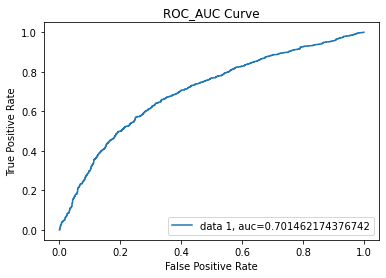

In [111]:
y_pred_proba = logreg.predict_proba(test_features)[::,1]
fpr, tpr, _ = roc_curve(test_labels,  y_pred_proba)
auc = roc_auc_score(test_labels, y_pred_proba)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC_AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [112]:
import timeit
start = timeit.default_timer()
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, random_state=42)
rf.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=200, random_state=42)

In [113]:
predictions = rf.predict(test_features)
print(classification_report(test_labels, predictions))
stop = timeit.default_timer()
print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1038
           1       0.92      0.90      0.91      1962

    accuracy                           0.89      3000
   macro avg       0.87      0.88      0.88      3000
weighted avg       0.89      0.89      0.89      3000

Time:  1.384212999997544


In [114]:
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
conf = confusion_matrix(test_labels,predictions)
print("Confusion Matrix:")
print(conf)
print("Accuracy:",accuracy_score(test_labels, predictions))
print("Precision:",precision_score(test_labels, predictions))
print("Recall:",recall_score(test_labels, predictions))

Mean Absolute Error: 0.11 degrees.
Confusion Matrix:
[[ 890  148]
 [ 190 1772]]
Accuracy: 0.8873333333333333
Precision: 0.9229166666666667
Recall: 0.9031600407747197


In [89]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Preferred Color of Device Importance: 0.24
Variable: Donate ID            Importance: 0.18
Variable: Favorite Flavor Of Ice Cream Importance: 0.15
Variable: How many desserts do you eat a week Importance: 0.1
Variable: Deposit Amount       Importance: 0.09
Variable: Ice Cream Products Consumed Per Week Importance: 0.09
Variable: Household Income     Importance: 0.09
Variable: Gender               Importance: 0.03
Variable: Donated To Kick Starter Before Importance: 0.03
Variable: Do you own a Keurig  Importance: 0.01


0.8663199047804235


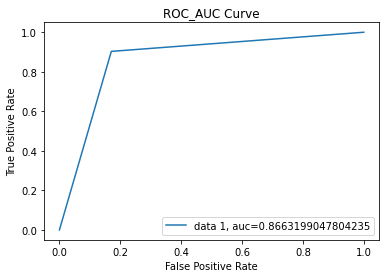

In [95]:
y_pred_proba = rf.predict_proba(test_features)[::,1]
fpr, tpr, _ = roc_curve(test_labels,  y_pred_proba)
auc = roc_auc_score(test_labels, y_pred_proba)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC_AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [96]:
# decision tree

import timeit
start = timeit.default_timer()
from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier(random_state=42)
rf.fit(train_features, train_labels)

DecisionTreeClassifier(random_state=42)

In [97]:
predictions = rf.predict(test_features)
print(classification_report(test_labels, predictions))
stop = timeit.default_timer()
print('Time: ', stop - start)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1038
           1       0.91      0.90      0.91      1962

    accuracy                           0.88      3000
   macro avg       0.86      0.87      0.87      3000
weighted avg       0.88      0.88      0.88      3000

Time:  2.2003842080011964


In [98]:
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
conf = confusion_matrix(test_labels,predictions)
print("Confusion Matrix:")
print(conf)
print("Accuracy:",accuracy_score(test_labels, predictions))
print("Precision:",precision_score(test_labels, predictions))
print("Recall:",recall_score(test_labels, predictions))

Mean Absolute Error: 0.12 degrees.
Confusion Matrix:
[[ 861  177]
 [ 190 1772]]
Accuracy: 0.8776666666666667
Precision: 0.9091841970241149
Recall: 0.9031600407747197


In [99]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Preferred Color of Device Importance: 0.24
Variable: Donate ID            Importance: 0.16
Variable: Household Income     Importance: 0.15
Variable: Favorite Flavor Of Ice Cream Importance: 0.13
Variable: Deposit Amount       Importance: 0.09
Variable: How many desserts do you eat a week Importance: 0.09
Variable: Ice Cream Products Consumed Per Week Importance: 0.07
Variable: Gender               Importance: 0.03
Variable: Donated To Kick Starter Before Importance: 0.03
Variable: Do you own a Keurig  Importance: 0.01


0.8663199047804235


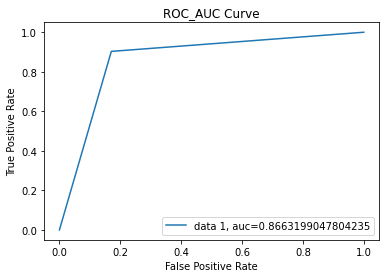

In [100]:
y_pred_proba = rf.predict_proba(test_features)[::,1]
fpr, tpr, _ = roc_curve(test_labels,  y_pred_proba)
auc = roc_auc_score(test_labels, y_pred_proba)
print(auc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title("ROC_AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()